# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pandas.tools.plotting import scatter_matrix

In [2]:
data=pd.read_csv("D49.csv")
data.head()

,Unnamed: 0,F0,F1,F2,F3,F4,F5,Label
0,0,0.348462,0.313163,-0.883081,0.011705,0.021841,0.007599,0
1,1,0.377118,0.302959,-0.875143,0.005516,0.009458,0.001826,1
2,2,0.362622,0.306870,-0.879939,0.001426,0.005996,0.002257,1
3,3,0.360025,0.282392,-0.888977,0.004788,0.017349,0.005781,1
4,4,0.361235,0.280317,-0.889302,0.003201,0.007381,0.003100,1


In [3]:
data=data.drop('Unnamed: 0',axis=1)
data.head()

,F0,F1,F2,F3,F4,F5,Label
0,0.348462,0.313163,-0.883081,0.011705,0.021841,0.007599,0
1,0.377118,0.302959,-0.875143,0.005516,0.009458,0.001826,1
2,0.362622,0.306870,-0.879939,0.001426,0.005996,0.002257,1
3,0.360025,0.282392,-0.888977,0.004788,0.017349,0.005781,1
4,0.361235,0.280317,-0.889302,0.003201,0.007381,0.003100,1


# Exploratory Data Analysis

In [4]:
data1=data.drop('Label',axis = 1)
data1.describe()

,F0,F1,F2,F3,F4,F5
count,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000
mean,0.270045,0.273486,-0.914659,0.029286,0.031333,0.012650
std,0.083154,0.056479,0.027533,0.037563,0.035170,0.013287
min,-0.034902,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.241176,0.257207,-0.926121,0.003580,0.006310,0.002822
50%,0.295948,0.285910,-0.911985,0.016878,0.018052,0.008173
75%,0.320237,0.305767,-0.896730,0.035770,0.040951,0.017039
max,0.495358,0.393770,-0.827965,0.234595,0.174415,0.080896


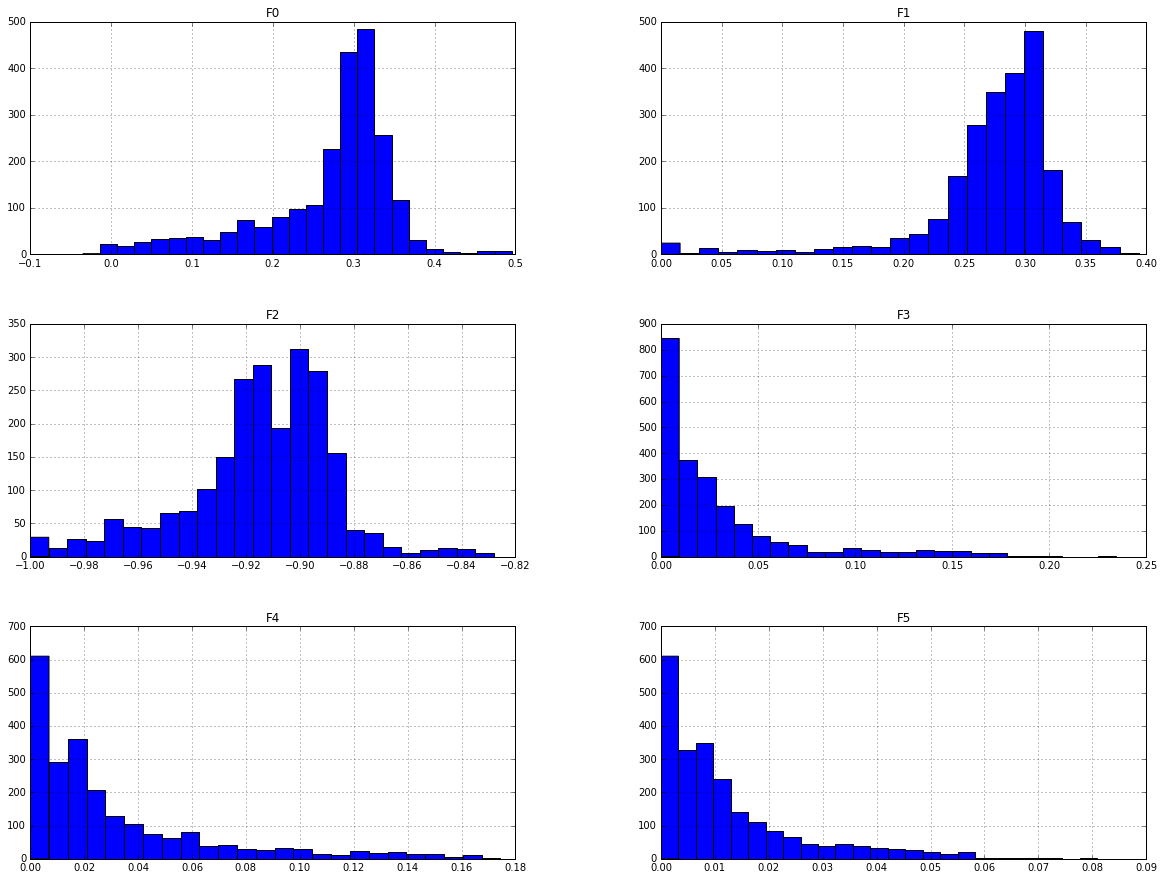

In [5]:
data1.hist(bins=25,figsize=(20,15))
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f9844d97ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9844da4a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9845560d10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f98455606d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9844d97cd0>,
  <matplotlib.lines.Line2D at 0x7f98454f1090>]}

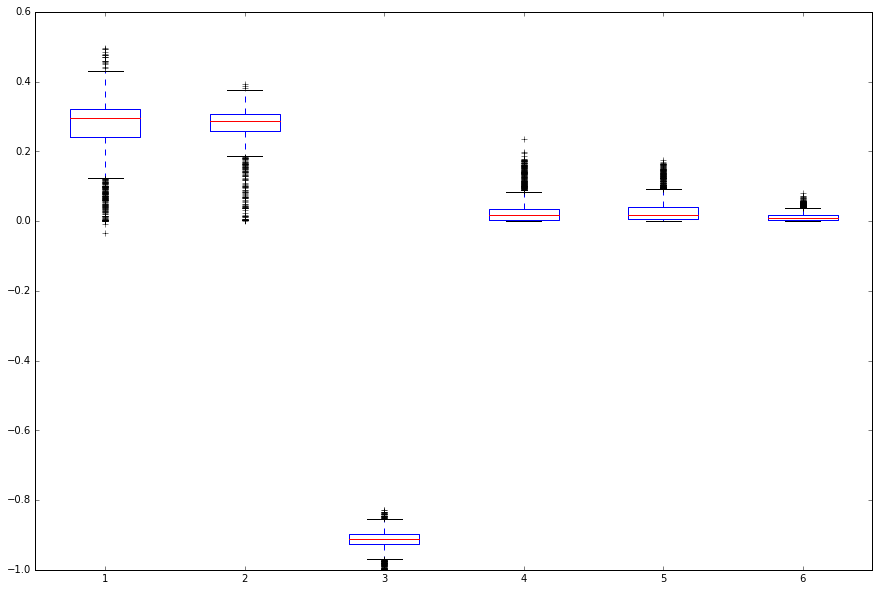

In [6]:
data1=np.array(data1)
plt.figure(1,figsize=(15, 10))
plt.boxplot(data1)

# Creating Training and Test Dataset

In [7]:
train_set, test_set=train_test_split(data,test_size=0.2,random_state=42)
train_data=data.copy()

In [8]:
correlation_matrix=train_data.corr()
correlation_matrix['Label'].sort_values(ascending=False)

Label    1.000000
F1       0.114751
F0       0.098540
F2       0.000601
F4      -0.405060
F5      -0.419292
F3      -0.423992
Name: Label, dtype: float64

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98454d24d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f98443105d0>]], dtype=object)

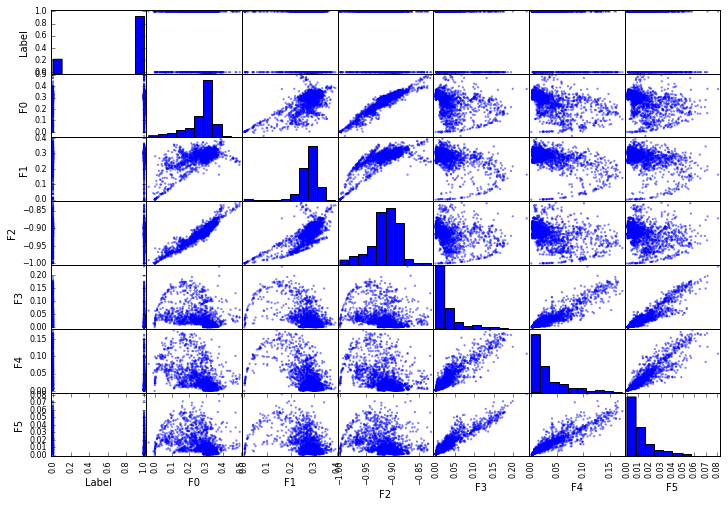

In [9]:
attributes = [ "Label", "F0","F1","F2","F3","F4","F5"]
scatter_matrix(train_data[attributes], figsize=(12, 8))

# Preparing the Data

In [10]:
train_data = train_set.drop('Label', axis=1)
train_labels = train_set['Label'].copy()
train_data.head()

,F0,F1,F2,F3,F4,F5
121,0.316162,0.293356,-0.901531,0.010711,0.030875,0.012595
173,0.342953,0.328651,-0.879980,0.000991,0.002371,0.001007
1245,0.157628,0.227237,-0.958732,0.040457,0.047689,0.020932
1323,0.011324,0.099787,-0.991258,0.033611,0.077369,0.014335
999,0.263980,0.299922,-0.915451,0.034215,0.030451,0.014590


In [11]:
test_data = test_set.drop('Label', axis=1)
test_labels = test_set['Label'].copy()
test_data.shape

(451, 6)

## Checking for any null or NAN values in training dataset

In [12]:
sample_incomplete_rows = train_data[train_data.isnull().any(axis=1)].head()
sample_incomplete_rows

,F0,F1,F2,F3,F4,F5


## Checking for any null or NAN values in test dataset

In [13]:
sample_incomplete_rows = test_data[test_data.isnull().any(axis=1)].head()
sample_incomplete_rows

,F0,F1,F2,F3,F4,F5


# Binary Classification

In [14]:
X=np.array(train_data)
# X=X[:,(0,1,2,3,4)]
Y=np.array(train_labels).flatten()
test_data=np.array(test_data)
# test_data=test_data[:,(0,1,2,3,4)]
test_labels=np.array(test_labels).flatten()

# Nearest Neighbours

In [15]:
predicted_labels=[]
for i in range(len(test_data)):
    # euclidean distance
    minimum_distance=((np.dot(test_data[i],test_data[i]))-2*(np.dot(test_data[i],X[0]))+(np.dot(X[0],X[0])))**0.5
    closest_neighbour=Y[0]
    for j in range(1,len(X)):
        # euclidean distance
        distance=((np.dot(test_data[i],test_data[i]))-2*(np.dot(test_data[i],X[j]))+(np.dot(X[j],X[j])))**0.5
        if(distance < minimum_distance):
            minimum_distance=distance
            closest_neighbour=Y[j]
    predicted_labels.append(closest_neighbour)
# print(predicted_labels)

# Accuracy score - Nearest Neighbours

In [16]:
metrics.accuracy_score(test_labels,predicted_labels)

0.82039911308203994

# Precision - Nearest Neighbours

In [17]:
metrics.precision_score(test_labels,predicted_labels)

0.88154269972451793

# F-measure - Nearest Neighbours

In [18]:
metrics.f1_score(test_labels, predicted_labels)

0.88765603328710119

# Recall - Nearest Neighbours

In [19]:
metrics.recall_score(test_labels,predicted_labels)

0.8938547486033519

# AUC - Nearest Neighbours

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicted_labels)
metrics.auc(fpr, tpr)

0.7157445786027512

# Naive Bayes Classifier

In [21]:
# Assuming data is fitted to a Gaussian
def probability(mean, std, x):
    exponential=np.exp(-1*(x-mean)**2/(2*(std**2)))
    return ((1/(std*((22/7.0)**0.5)))*(exponential))

In [22]:
# Fitting Gausian
def gaussian_parameters(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    return (mean,std)

The following code is to get data points corresponding to each class

In [23]:
data_class1= [X[i] for i in range(len(Y)) if Y[i]==1] # class1 refers to data corresponding to flower Iris-Virginica
data_class2= [X[i] for i in range(len(Y)) if Y[i]==0] # class2 refers to data does not corresponds to flower Iris-Virginica  

In [24]:
(mean_class1,std_class1)=gaussian_parameters(data_class1) # get each features gaussian parameters if their class is class1
(mean_class2,std_class2)=gaussian_parameters(data_class2) # get each features gaussian parameters if their class is class2
print(mean_class1,std_class1)
print(mean_class2,std_class2)
total_class1=0
for i in range(len(Y)):
    if(Y[i]==1):
        total_class1=total_class1+1
class1_probability=float(total_class1)/len(Y)
class2_probability=1-class1_probability

(array([ 0.27275833,  0.27629228, -0.91505086,  0.02149636,  0.02447165,
        0.00998435]), array([ 0.07701756,  0.05030887,  0.02520819,  0.028639  ,  0.02749351,
        0.01060775]))
(array([ 0.25815646,  0.26298302, -0.91339238,  0.05881004,  0.0575178 ,
        0.02286286]), array([ 0.10439324,  0.07595079,  0.03558553,  0.0486533 ,  0.04528142,
        0.01641784]))


In [25]:
predicted_labels=[]
for i in range(len(test_data)):
    probability_class1=1
    probability_class2=1
    for j in range(len(test_data[i])):
        probability_class1=probability_class1*probability(mean_class1[j],std_class1[j],test_data[i][j])
        probability_class2=probability_class2*probability(mean_class2[j],std_class2[j],test_data[i][j])
    probability_class1=probability_class1*class1_probability
    probability_class2=probability_class2*class2_probability
    if(probability_class1>probability_class2):
        predicted_labels.append(1)
    else:
        predicted_labels.append(0)

# Accuracy score - Naive Bayes Classifier

In [26]:
metrics.accuracy_score(test_labels,predicted_labels)

0.82483370288248337

# Precision - Naive Bayes Classifier

In [27]:
metrics.precision_score(test_labels,predicted_labels)

0.88010899182561309

# F-measure - Naive Bayes Classifier

In [28]:
metrics.f1_score(test_labels, predicted_labels)

0.89103448275862063

# Recall - Naive Bayes Classifier

In [29]:
metrics.recall_score(test_labels,predicted_labels)

0.9022346368715084

# AUC - Naive Bayes Classifier

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicted_labels)
metrics.auc(fpr, tpr)

0.71455817865080795

# Logistic Regression - Gradient Descent

Create a copy of features of test data and insert value "1" as first feature in every data point of test_data

In [31]:
X_data=np.copy(X)
X_data=np.insert(X_data, 0, values=[1], axis=1)

In [32]:
def sigmoid(z):
    return 1.0/(1+np.exp(-1*z))
def gradient_descent_logistic_regression(X_data,Y,learning_rate,number_iterations):
    theta=np.zeros(X_data.shape[1])
    for i in range(number_iterations):
        z=np.dot(X_data,theta)
        p=sigmoid(z)
        gradient=np.dot(X_data.T, (p - Y)) / Y.size
        theta=theta-learning_rate*gradient
    return theta

In [33]:
learning_rate=0.1
number_iterations=30000
theta=gradient_descent_logistic_regression(X_data,Y,learning_rate,number_iterations)
print(theta)

[-0.17663526 -0.57613105 -0.18053318 -2.67129482 -9.51245628 -8.19344869
 -3.35574845]


In [34]:
test_data_new=np.copy(test_data)
test_data_new=np.insert(test_data_new, 0, values=[1], axis=1);
predicted_labels=[]
for i in range(len(test_data_new)):
    if(sigmoid(np.dot(test_data_new[i],theta))>0.5):
        predicted_labels.append(1)
    else:
        predicted_labels.append(0)
# print(predicted_labels)

# Accuracy score - Logistic Regression (Gradient Descent)

In [35]:
metrics.accuracy_score(test_labels,predicted_labels)

0.83148558758314861

# Precision - Logistic Regression (Gradient Descent)

In [36]:
metrics.precision_score(test_labels,predicted_labels)

0.83732057416267947

# F-measure - Logistic Regression (Gradient Descent)

In [37]:
metrics.f1_score(test_labels, predicted_labels)

0.90206185567010311

# Recall - Logistic Regression (Gradient Descent)

In [38]:
metrics.recall_score(test_labels,predicted_labels)

0.97765363128491622

# AUC - Logistic Regression (Gradient Descent)

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicted_labels)
metrics.auc(fpr, tpr)

0.62323541779299574

# Logistic Regression - Newton's method

In [ ]:
def newton_method_logistic_regression(X_data,Y,number_iterations):
    theta=np.zeros(X_data.shape[1])
    for i in range(number_iterations):
        z=np.dot(X_data,theta)
        p=sigmoid(z)
        gradient=np.dot(X_data.T, (p - Y)) / Y.size
        column=(np.ones(p.size)).T
        prob_product = np.dot(p,column-p)
        learning_rate=np.linalg.inv(np.dot(prob_product,np.dot(X_data.T,X_data)/ Y.size))
        theta=theta-np.dot(learning_rate,gradient)
    return theta

In [ ]:
theta=newton_method_logistic_regression(X_data,Y,number_iterations)
print(theta)

In [ ]:
predicted_labels=[]
for i in range(len(test_data_new)):
    if(sigmoid(np.dot(test_data_new[i],theta))>0.5):
        predicted_labels.append(1)
    else:
        predicted_labels.append(0)

# Accuracy score - Logistic Regression (Newton's method)

In [ ]:
metrics.accuracy_score(test_labels,predicted_labels)

# Precision - Logistic Regression (Newton's method)

In [ ]:
metrics.precision_score(test_labels,predicted_labels)

# F-measure - Logistic Regression (Newton's method)

In [ ]:
metrics.f1_score(test_labels, predicted_labels)

# Recall - Logistic Regression (Newton's method)

In [ ]:
metrics.recall_score(test_labels,predicted_labels)

# AUC - Logistic Regression (Newton's method)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicted_labels)
metrics.auc(fpr, tpr)

# Logistic Regression (Library)

In [ ]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X,Y)

In [ ]:
predicted_labels=logistic_regression.predict(test_data) # prediction of labels for test data

# Accuracy score - Logistic Regression (library)

In [ ]:
metrics.accuracy_score(test_labels,predicted_labels)

# Precision - Logistic Regression (library)

In [ ]:
metrics.precision_score(test_labels,predicted_labels)

# F-measure - Logistic Regression (library)

In [ ]:
metrics.f1_score(test_labels, predicted_labels)

# Recall - Logistic Regression (library)

In [ ]:
metrics.recall_score(test_labels,predicted_labels)

# AUC - Logistic Regression (library)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicted_labels)
metrics.auc(fpr, tpr)